# Bank Customer Churn Rates

### Kris Barbier

## Phase 1: EDA

This phase of the project will look at data relating to members of a bank. EDA will help to identify key factors that may lead to members churning in the future.

### Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Custom Visualization Functions

In [2]:
#Univariate plots for EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [23]:
#Multivariate plots for EDA
def plot_categorical_vs_target(df, x, y='Exited',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Exited',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Load and Preview Data

In [4]:
#Load dataset
df = pd.read_csv('Data/churn_modelling - churn_modelling.csv')

#Inspect data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Preview info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- There are 10,000 records in this data set, with data in 14 columns. There are two columns that contain decimal values, nine columns that contain integer values, and three columns that contain non-numerical values.

In [6]:
#Check shape of dataset
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns in this data set.')

There are 10000 rows, and 14 columns in this data set.


In [7]:
#Check summary stats of numerical data
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
#Check summary stats of non-numerical data
df.describe(exclude = 'number')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Clean Data

In [9]:
#Remove duplicates

In [10]:
#Check for missing values

In [11]:
#Add non-binarized columns for visuals


### EDA Visuals

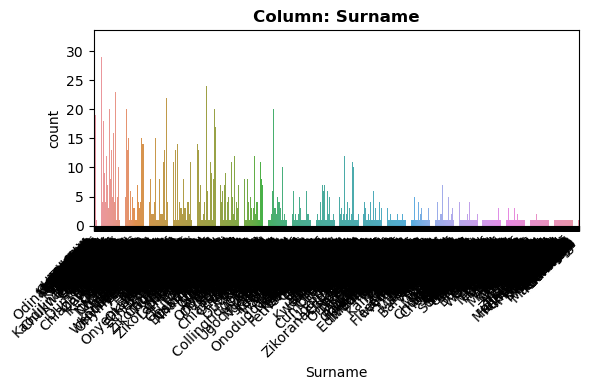

- NaN's Found: 0 (0.0%)
- Unique Values: 2932
- Most common value: 'Smith' occurs 32 times (0.32%)
- Not constant or quasi-constant.


In [15]:
#Call function
explore_categorical(df, x = "Surname");

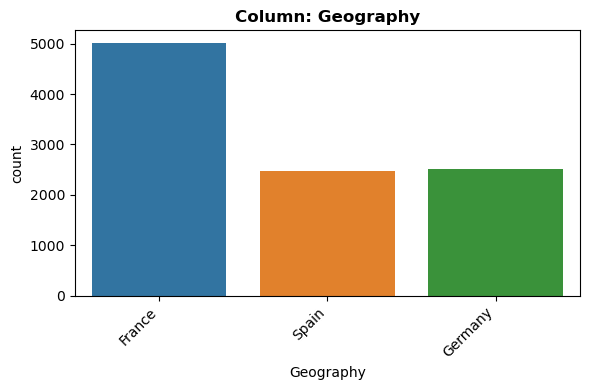

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'France' occurs 5014 times (50.14%)
- Not constant or quasi-constant.


In [16]:
#Call function
explore_categorical(df, x = 'Geography');

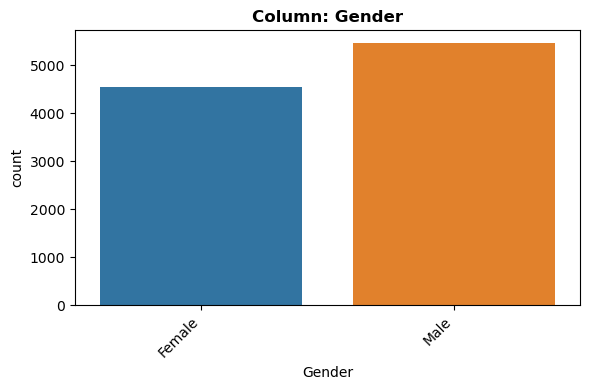

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Male' occurs 5457 times (54.57%)
- Not constant or quasi-constant.


In [14]:
#Call function
explore_categorical(df, x = 'Gender');

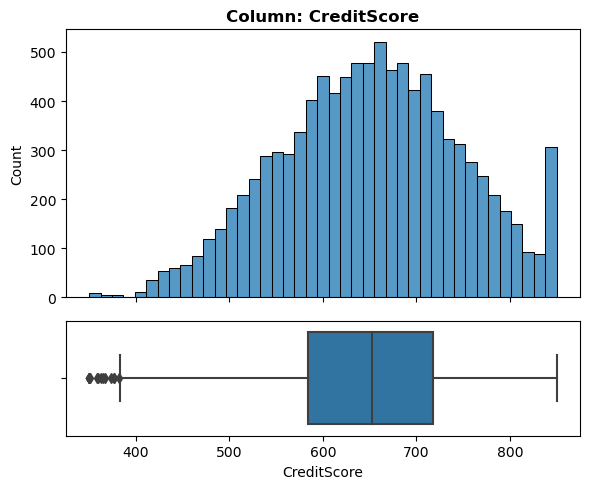

- NaN's Found: 0 (0.0%)
- Unique Values: 460
- Most common value: '850' occurs 233 times (2.33%)
- Not constant or quasi-constant.


In [17]:
#Call function
explore_numeric(df, x = 'CreditScore');

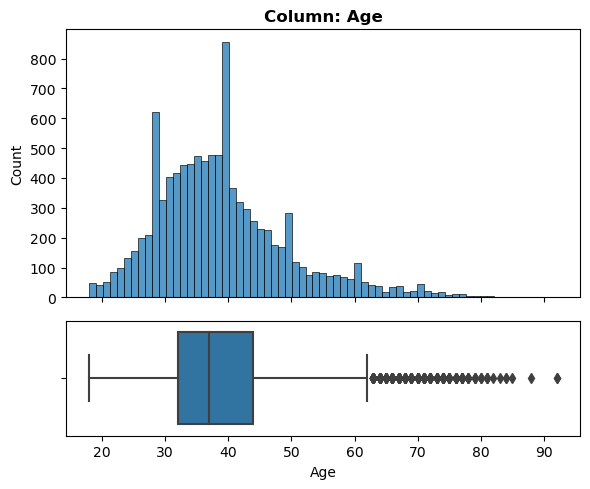

- NaN's Found: 0 (0.0%)
- Unique Values: 70
- Most common value: '37' occurs 478 times (4.78%)
- Not constant or quasi-constant.


In [18]:
#Call function
explore_numeric(df, x = 'Age');

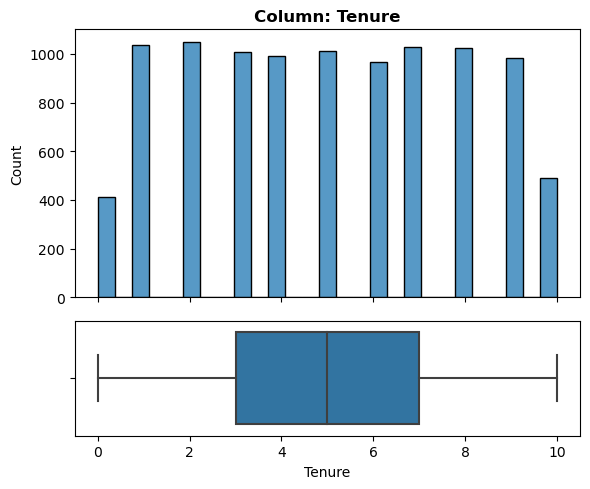

- NaN's Found: 0 (0.0%)
- Unique Values: 11
- Most common value: '2' occurs 1048 times (10.48%)
- Not constant or quasi-constant.


In [19]:
#Call function
explore_numeric(df, x = 'Tenure');

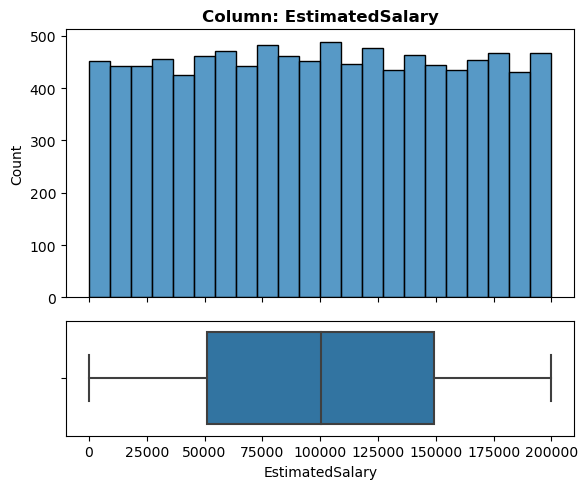

- NaN's Found: 0 (0.0%)
- Unique Values: 9999
- Most common value: '24924.92' occurs 2 times (0.02%)
- Not constant or quasi-constant.


In [20]:
#Call function
explore_numeric(df, x = 'EstimatedSalary');

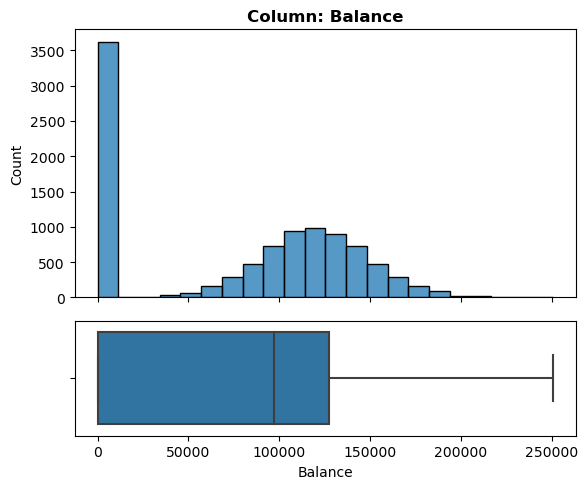

- NaN's Found: 0 (0.0%)
- Unique Values: 6382
- Most common value: '0.0' occurs 3617 times (36.17%)
- Not constant or quasi-constant.


In [21]:
#Call function
explore_numeric(df, x = 'Balance');

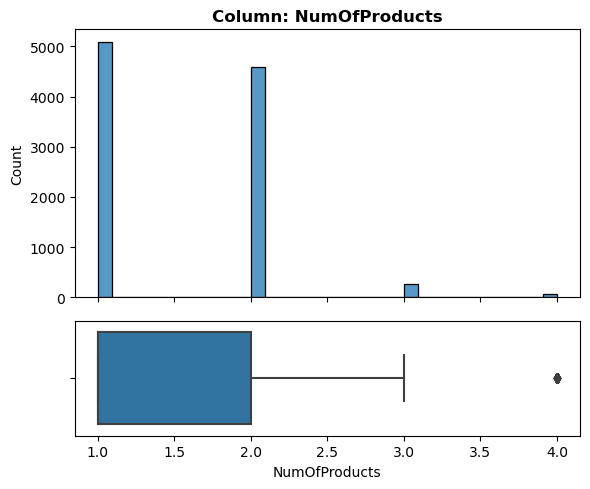

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '1' occurs 5084 times (50.84%)
- Not constant or quasi-constant.


In [22]:
#Call function
explore_numeric(df, x = 'NumOfProducts');

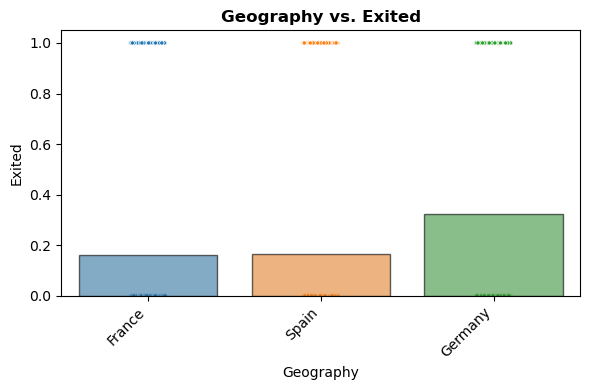

In [25]:
#Call function
plot_categorical_vs_target(df, x = 'Geography');

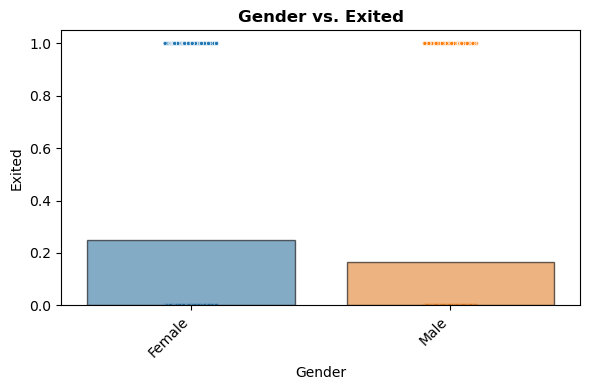

In [26]:
#Call function
plot_categorical_vs_target(df, x = 'Gender');

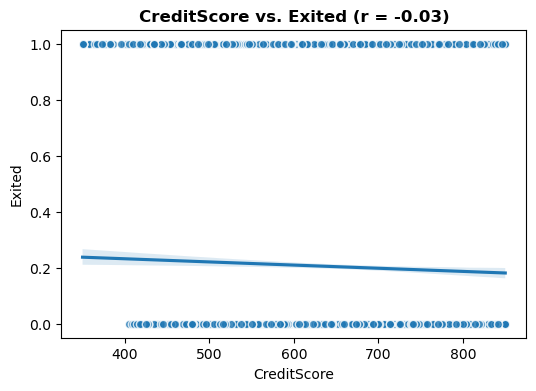

In [27]:
#Call function
plot_numeric_vs_target(df, x = 'CreditScore');

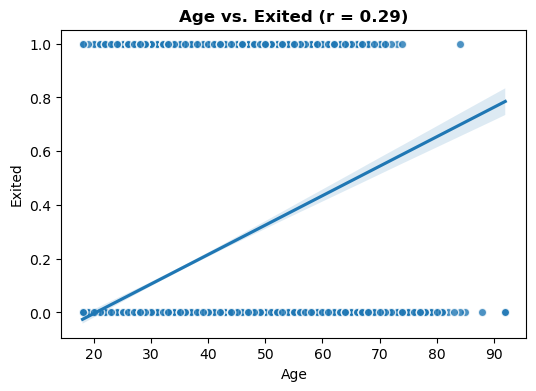

In [28]:
#Call function
plot_numeric_vs_target(df, x = 'Age');

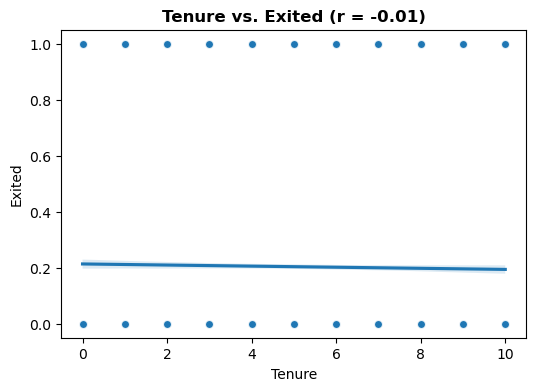

In [29]:
#Call function
plot_numeric_vs_target(df, x = 'Tenure');

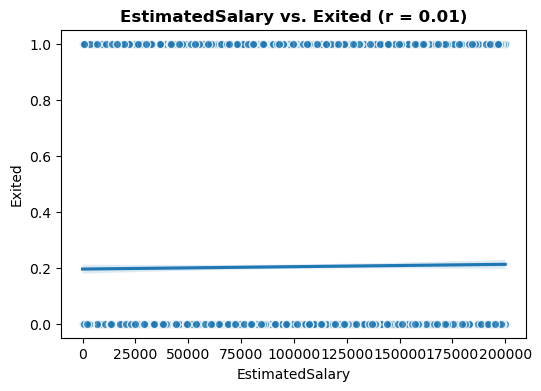

In [30]:
#Call function
plot_numeric_vs_target(df, x = 'EstimatedSalary');

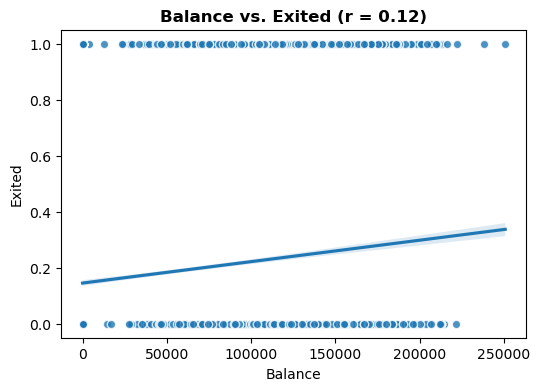

In [31]:
#Call function
plot_numeric_vs_target(df, x = 'Balance');

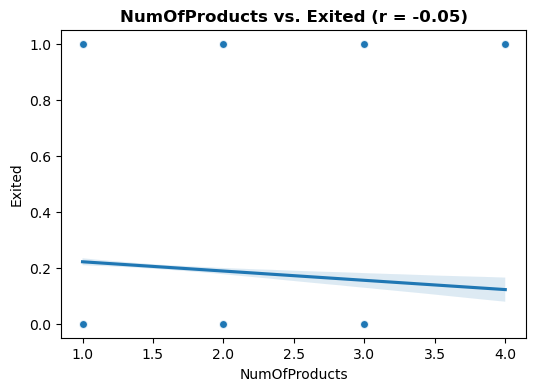

In [32]:
#Call function
plot_numeric_vs_target(df, x = 'NumOfProducts');

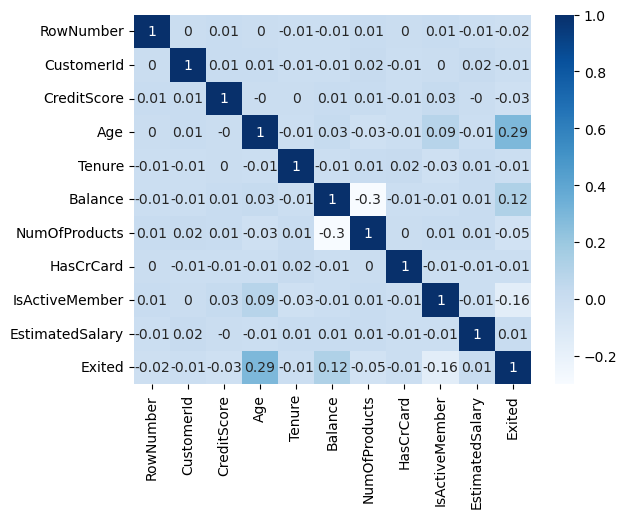

In [33]:
#Create a correlation heat map
corr = df.corr(numeric_only = True).round(2)
sns.heatmap(corr, cmap = 'Blues', annot = True);